# Heat capacity of a solid

Debye's theory of solids gives the heat capacity of a solid at temperature T to be 

$C_v=9V\rho k_B \big( \frac{T}{\theta_D} \big)^3 \int^{\theta_D/T}_0 \frac{x^4e^x}{(e^x-1)^2}dx$

where V is the volum of the solid, $\rho$ is the number density of atoms, $k_B$ is Boltzman's constant, and $\theta_D$ is the Debye temperature, a property of solids that depends on their density and speed of sound. 

First we analyse the integrand only, using Simpson's rule to see its general behaviour. We'll take $\theta_D=428$ K (for aluminium), and make a function to check the temperature dependence.

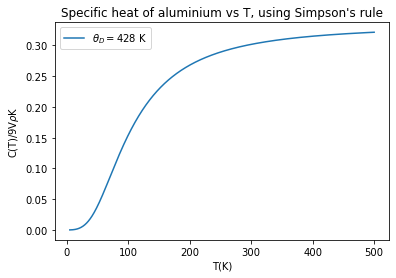

In [29]:
from pylab import plot,show,xlabel,ylabel,legend,title
from numpy import linspace
from math import exp


def f(x):
    return (x**4*exp(x))/(exp(x)-1)**2

def E(t):
    N = 100
    a = 0.00001
    b = 428/t
    h = (b-a)/N
    
    oddsum = 0
    for k in range(1,N,2):
        oddsum += f(a+k*h)
    
    evensum = 0
    for k in range(2,N,2):
        evensum += f(a+k*h)
    
    return (1/3)*h*(1/b)**3*(f(a)+f(b)+4*oddsum+2*evensum)

points = linspace(5,500,1000)
values = list(map(E,points)) 

plot(points,values,label="$\\theta_D = 428$ K")
legend(loc="upper left")
xlabel("T(K)")
ylabel("C(T)/9V$\\rho$K")
title("Specific heat of aluminium vs T, using Simpson's rule")
show()


# Gaussian Quadrature Method

Gaussian quadrature is an example of a higher order integration method. Whilst Simpson's rule uses quadratics (and the Trapezium rule uses straight line segments), we can create higher-order rules by using higher-order polynomials. For the trapezium and Simpson's rules, the general form is

$\int^a_b f(x)dx \simeq \sum^N_{k=1}w_kf(x_k)$

where the $x_k$ are the positions of the sample points at which we calculate the integrand and the $w_k$ are some set of weights. For Simpson's rule, the weights are $\frac{1}{3}$ for the first and last slices, and for the rest alternate between $\frac{4}{3}$ and $\frac{2}{3}$. The trapeziuim rule is exact if the function being integrated is in fact a straight line. Likewise, Simpson's rule is exact if the function is quadratic. We can extend this. Imagine we include rules of the form seen above, but where we can vary not only the weights $w_k$ but also the positions $x_k$ of the sample points. This allows us to give very accurate answers with only a small number of points (for cases where we need to do integrals very fast, or where the evaluation of an integral takes a long time). So we can use methods that are exact for polynomials up to degree $N-1$ with $N$ equally spaced points, and by varying the positions of the points we get $N$ extra degrees of freedom (thus achieving integration rules that are exact for polynomials up to degree $2N-1$). This leads to a very accurate integration method known as $\textbf{Gaussian quadrature}$.

To cut a long story short, to get an integration rule up to the highest possible degree of $2N-1$, the sample points $x_k$ should be chosen to coincide with the zeroes of the $N$th Legendre polynomial $P_N(x)$. The corresponding weights $w_k$ are

$w_k = \big[ \frac{2}{(1-x^2)}\big( \frac{dP_N}{dx} \big)^{-2} \big]_{x=x_k}$

The correct rule for mapping the points to a general domain that runs between $x=a$ to $x=b$ is

$x'_k = \frac{1}{2}(b-a)x_k+\frac{1}{2}(b+a)$

and similarly with the weights

$w'_k = \frac{1}{2}(b-a)w_k$

Once we have calculated the rescaled positions and weights, the integral becomes

$\int^b_a f(x) dx \simeq \sum^n_{k=1} w'_k f(x'_k)$

We will use the pre-made function gaussxw.py (found here: http://www-personal.umich.edu/~mejn/cp/programs.html) to calculate the heat capacity above, at a specific temperature (say 273 K). 


In [25]:
from gaussxw import gaussxw

T = input("Enter temperature: ")
x_d = 428/int(T)
N = 50
a = 0.01
b = x_d

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

s = 0.0
for k in range(N):
    s += (1/b)**3*wp[k]*f(xp[k])

print("The specific heat of aluminium (normalized to the volume*density*9K_B) at ",T ,"K is", s)




Enter temperature: 400
The specific heat of aluminium (normalized to the volume*density*9K_B) at  400 K is 0.31500493589557793


Now we'll use our function to make a graph of the heat capacity as a function of temperature from T = 5 K to T = 500 K, using the Gaussian quadrature method. 

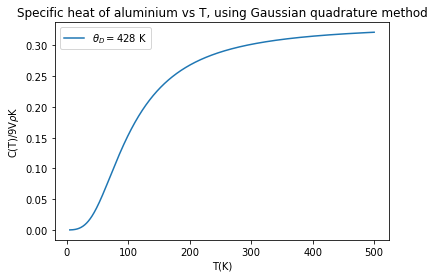

In [32]:
from gaussxw import gaussxw
from pylab import plot,show,xlabel,ylabel,legend,title

def Y(T):
    N = 100
    a = 0.00001
    b = 428/T
    
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
    s = 0.0
    
    for k in range(N):
        s += wp[k]*f(xp[k])
    
    return (1/b)**3*s

points = linspace(5,500,1000)
values = list(map(Y,points)) 

plot(points,values,label="$\\theta_D = 428$ K")
legend(loc="upper left")
xlabel("T(K)")
ylabel("C(T)/9V$\\rho$K")
title("Specific heat of aluminium vs T, using Gaussian quadrature method")
show()